# **Predicting Pasword_Strength using SVM, Logistics Regression and XGBoosting**

#### **Introduction**

How did we figure out which passwords were stronger and which were weaker?
In this notebook, I did how to find the password strength using traditional algorithms such as logistic regression model, SVM, Multinomial regression model and XGBoosting.

It is a multiclass classification problem. Given dataset has two features one is password and the other is dependent feature i.e. strength. This strength is classified as:

0-password is weak

1-password is medium

2-password is strong

Let us start with the password strength classification problem.


### **Overview**
1. Data Cleaning
2. EDA Analysis
3. Model Creation Such as Logistic Regression, SVM, etc...
4. Model Evaluation
5. Conclusions


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### **Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string 
import re
import warnings
import nltk
import numpy as np
import string
import os
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

# Read the dataset
url='/content/drive/MyDrive/Google_colab_project/Pasword_Strength.csv'
df=pd.read_csv(url,sep=',',error_bad_lines = False)#,encoding='latin-1'

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [ ]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
print("Shape of the dataset is"+" "+str(df.shape))

Shape of the dataset is (669640, 2)


Text(0.5, 1.0, 'Strength distributions')

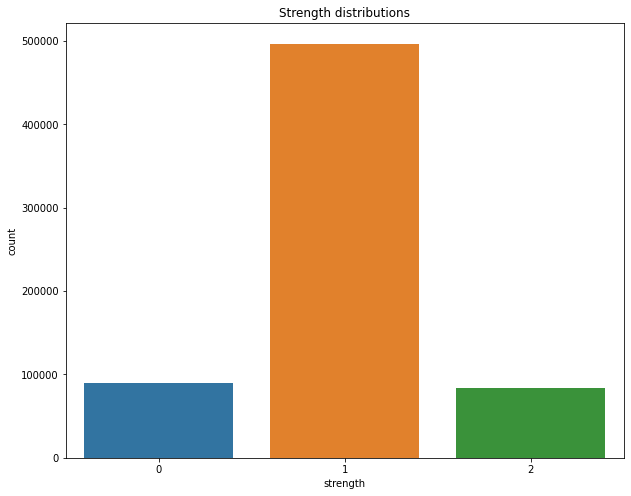

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df.strength)
plt.title('Strength distributions')

0-password is weak

1-password is medium

2-password is strong

By Visualizing the bar plot, we could see, Our data set seems like an imbalanced dataset and most of the passwords are medium strength.

### **Checking Missing  value**

In [ ]:
np.where(df['password'].isnull()==True)

(array([367579]),)

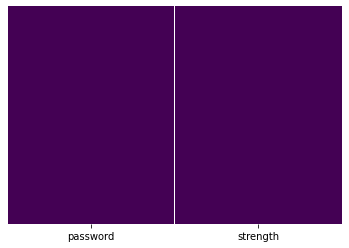

In [ ]:
#Check the null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

By Visualizing the heatmap we have only one missing value. So, we are going to drop those observations from the dataset

In [ ]:
### Drop Missisng Vlaues
df.dropna(inplace=True)

In [ ]:
df['password'].isnull().sum()

0

### **Analysing length of digits, length of Punctation...**

In [ ]:
# Find the length of character presented in password
df['char_count'] = df['password'].str.len()
# Find the length of number presented in password
df['numerics'] = df['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()]))
# Find the length of Alphabets presented in password
df['alpha'] = df['password'].apply(lambda x: len([x for x in list(x) if x.isalpha()]))
# Find the length of puncuation presented in password
specialSymbols = '!?%&.:~/\|,;<>-_+@#$%^&*(){}[]'
df['punc'] = df['password'].apply(lambda x: len([x for x in list(x) if x in specialSymbols]))
# Find the length of vowels presented in password
vowels = ['a', 'e', 'i', 'o', 'u']
df['vowels'] = df['password'].apply(lambda x: len([x for x in list(x) if x in vowels]))
# Find the length of consonants presented in password
df['consonants'] = df['password'].apply(lambda x: len([x for x in list(x) if x not in vowels and x.isalpha()]))

df.head()

,password,strength,char_count,numerics,alpha,punc,vowels,consonants
0,kzde5577,1,8,4,4,0,1,3
1,kino3434,1,8,4,4,0,2,2
2,visi7k1yr,1,9,2,7,0,2,5
3,megzy123,1,8,3,5,0,1,4
4,lamborghin1,1,11,1,10,0,3,7


### **Data Visualizations**

#### Here, For Understanding the dataset, I used an automated visualization library to visualize the data 

In [ ]:
!pip install autoviz==0.0.6
import autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()#create the object

Imported AutoViz_Class. Call by using AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)


Shape of your Data Set: (669639, 8)
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
    List of variables removed: ['password']
Since Number of Rows in data 669639 exceeds maximum, randomly sampling 1000 rows for EDA...
Data Set Shape: 1000 rows, 7 cols

Data Set columns info:
* strength: 0 nulls, 3 unique vals, most common: {1: 741, 0: 144}
* char_count: 0 nulls, 18 unique vals, most common: {10: 207, 9: 204}

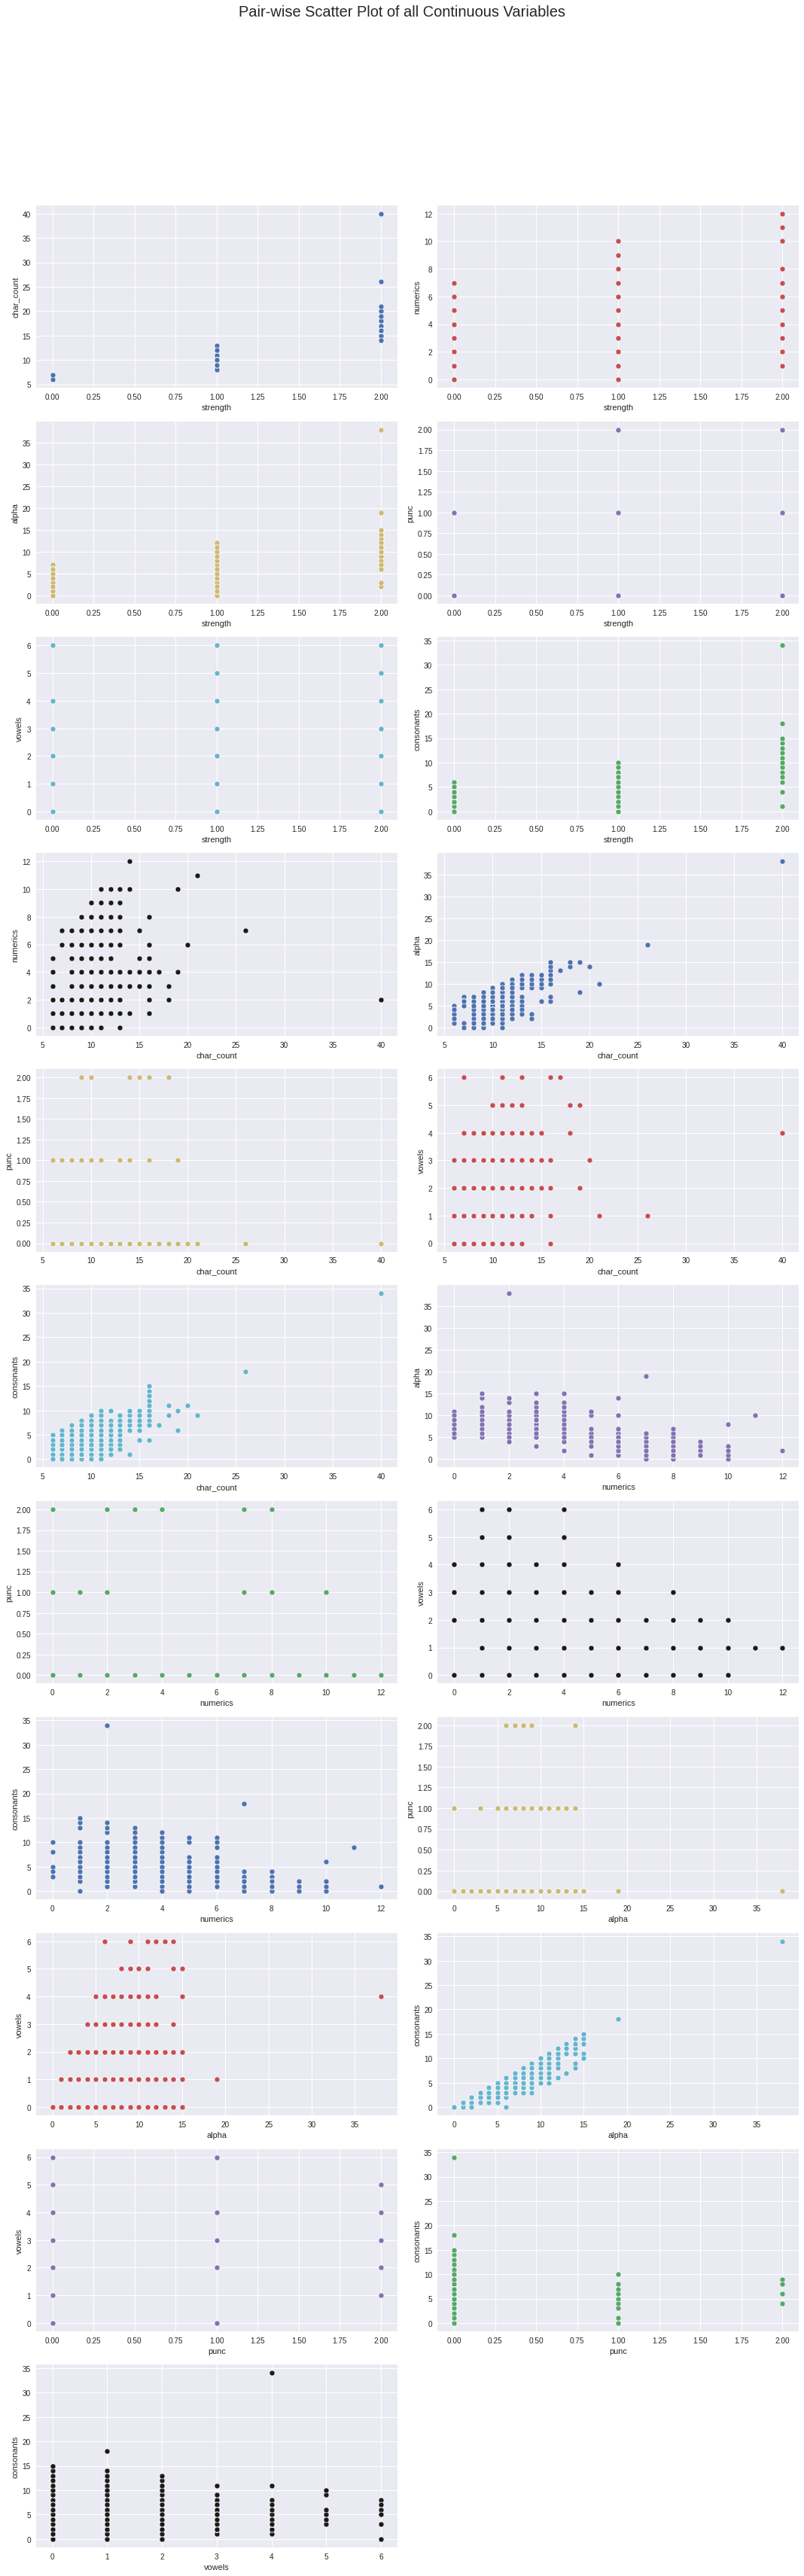

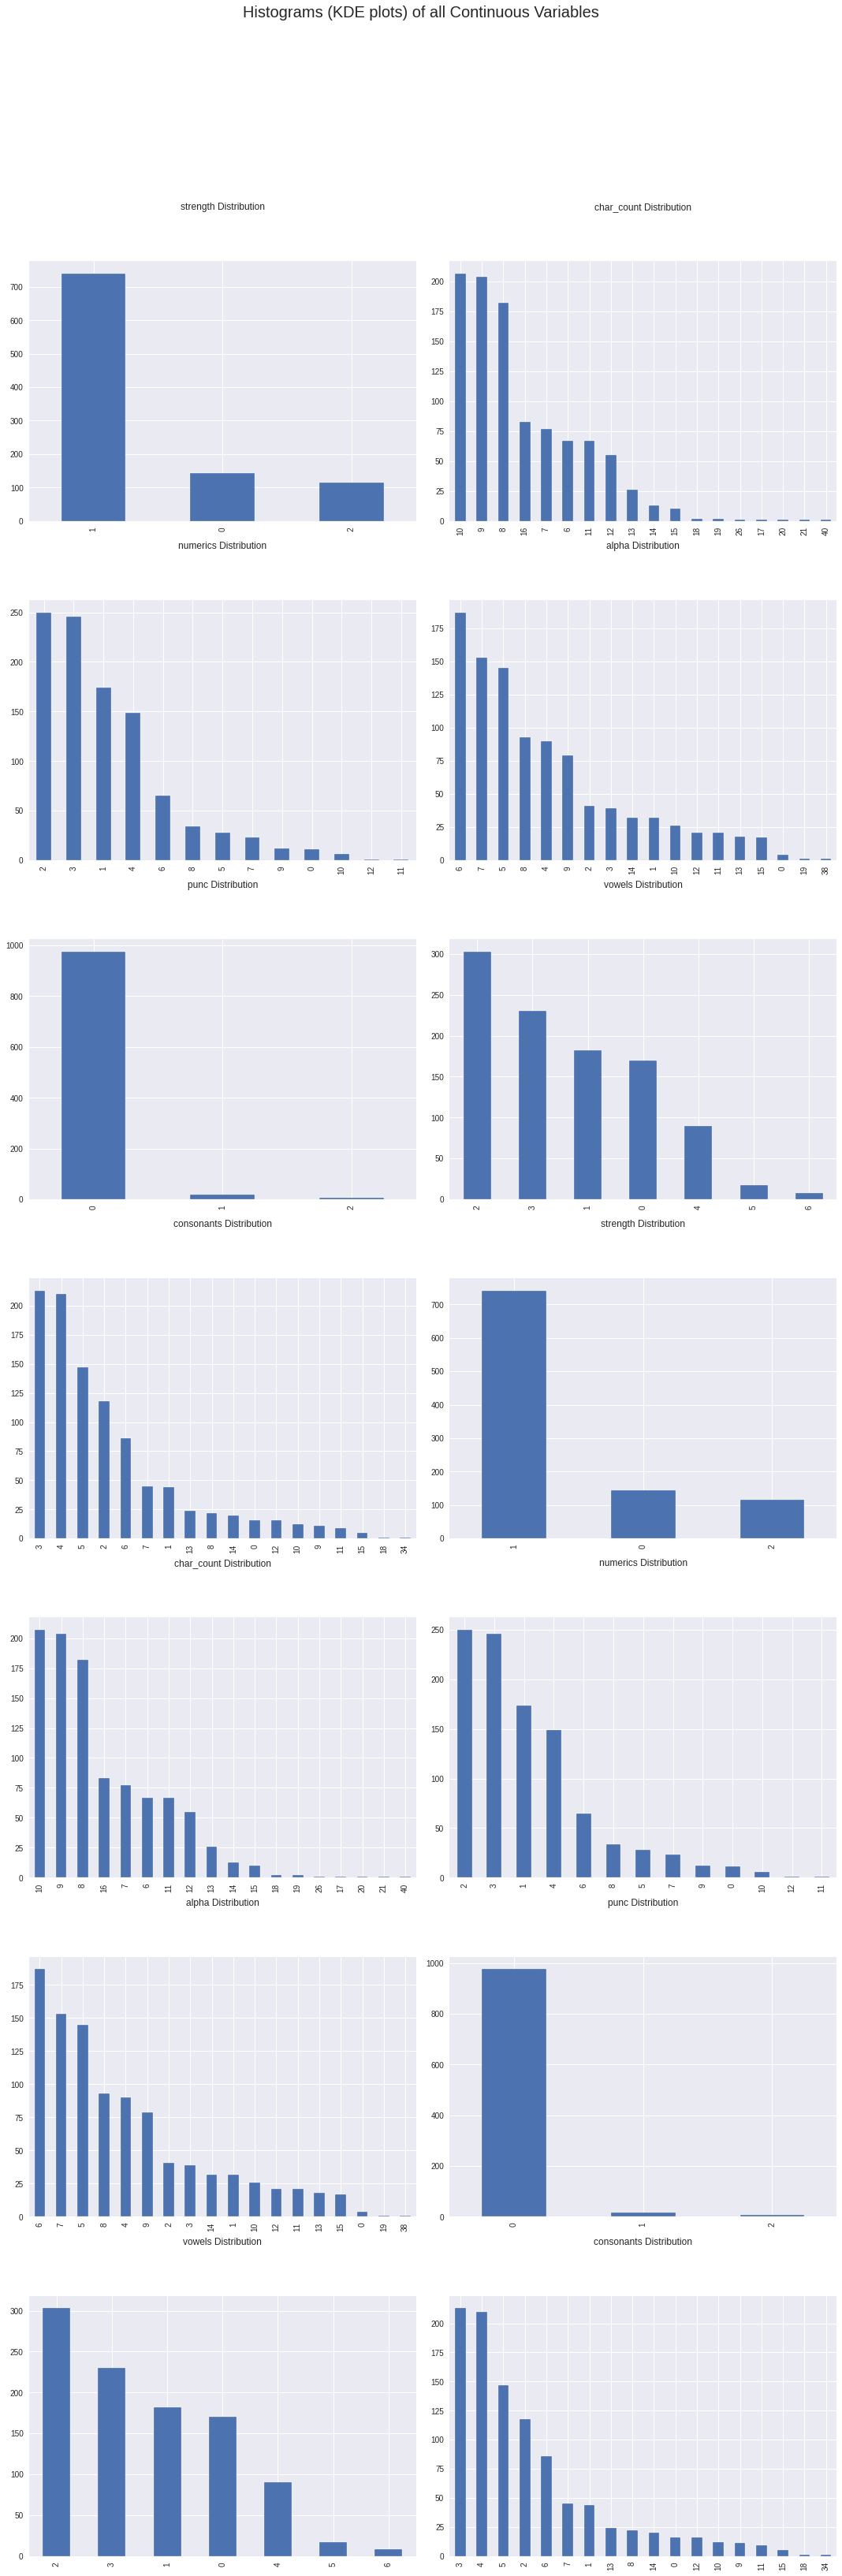

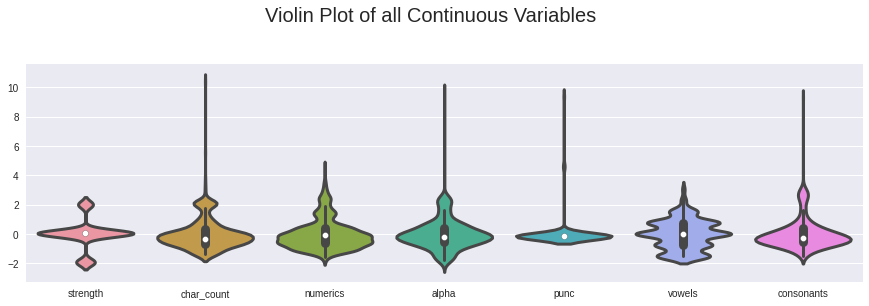

No date vars could be found in data set


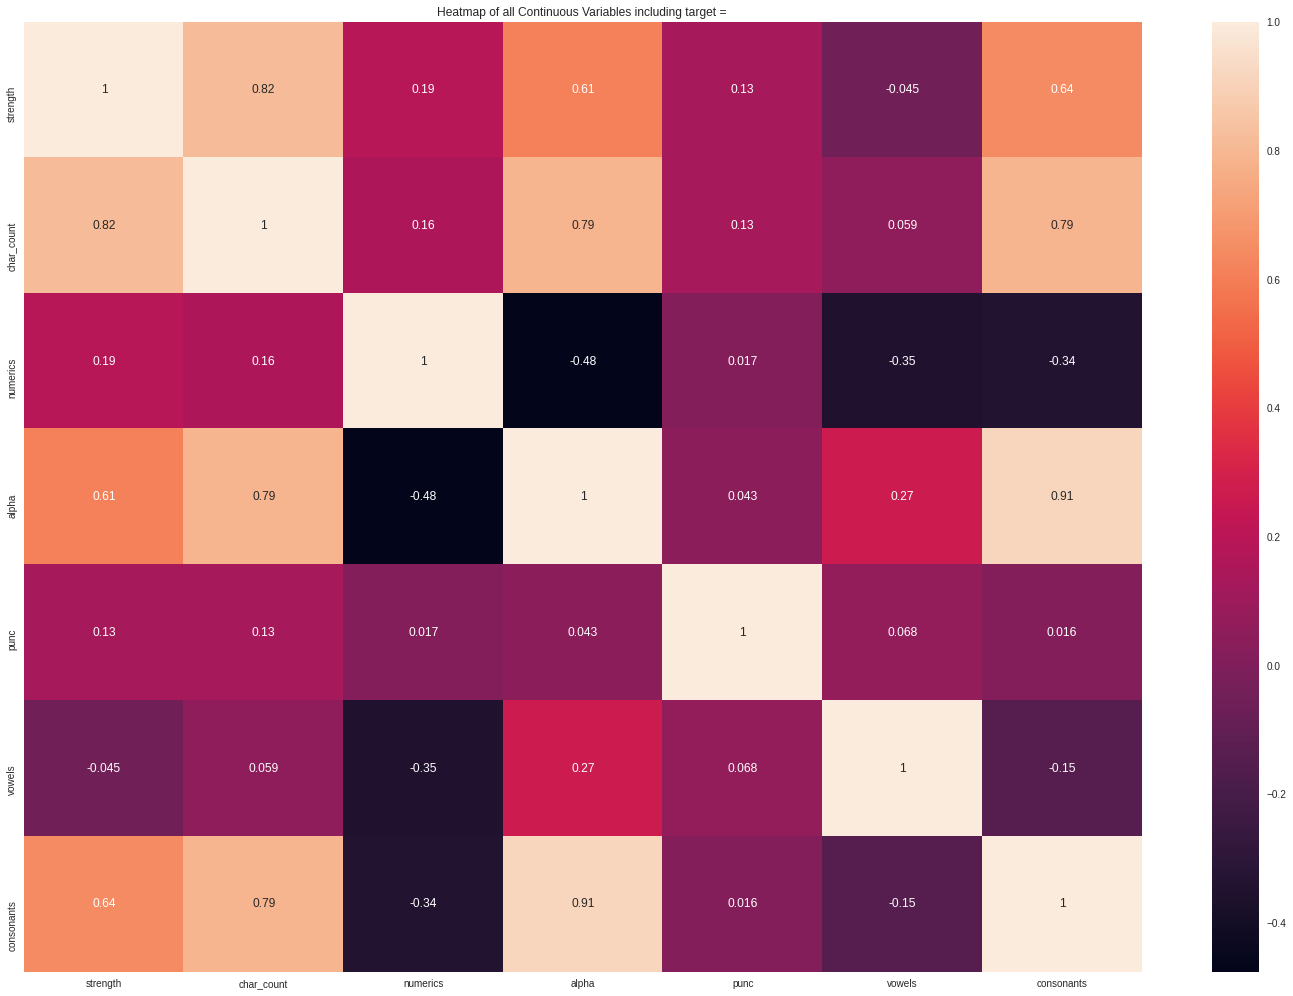

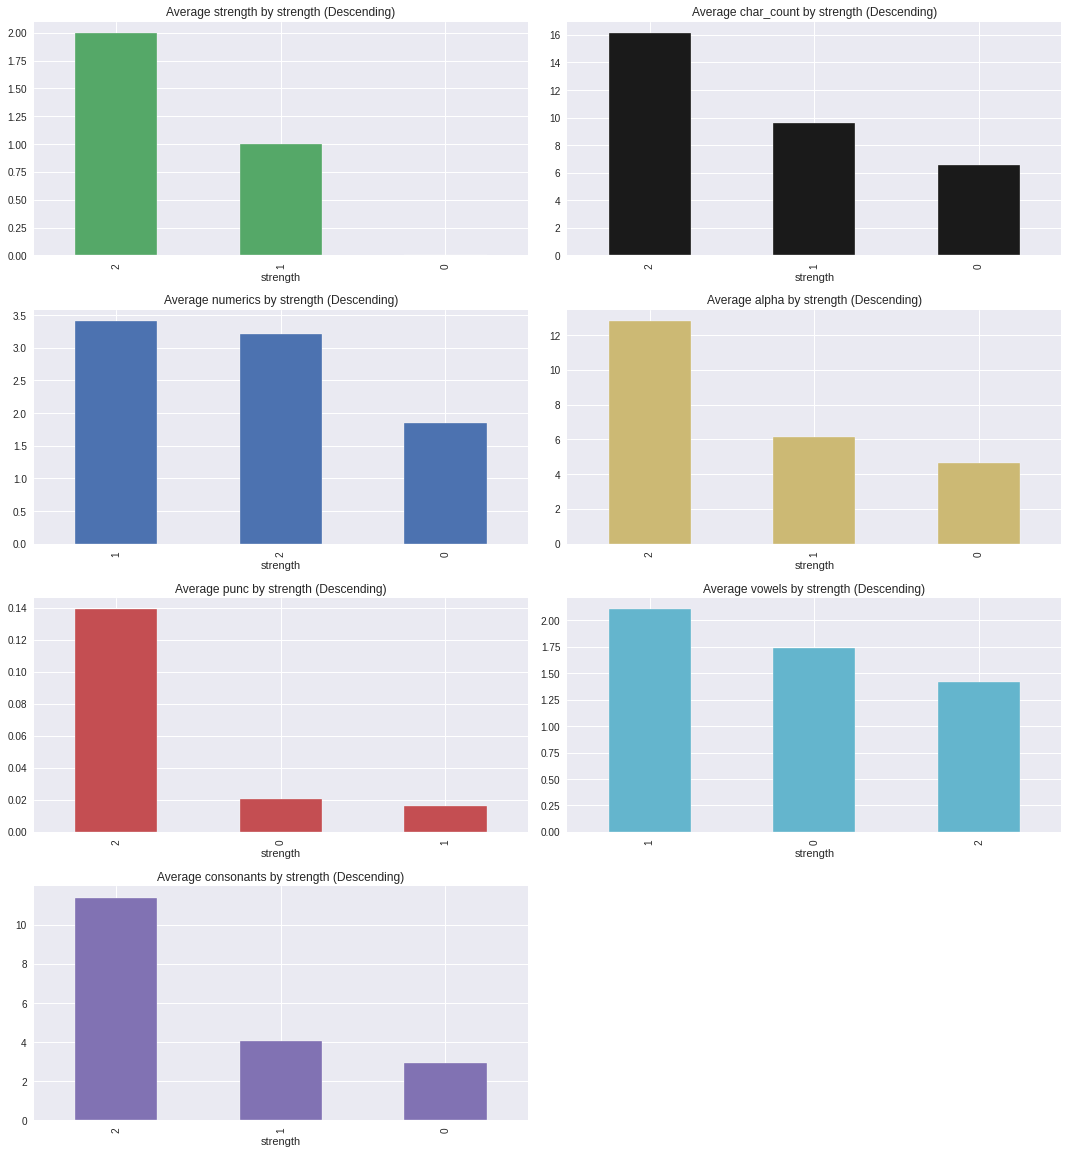

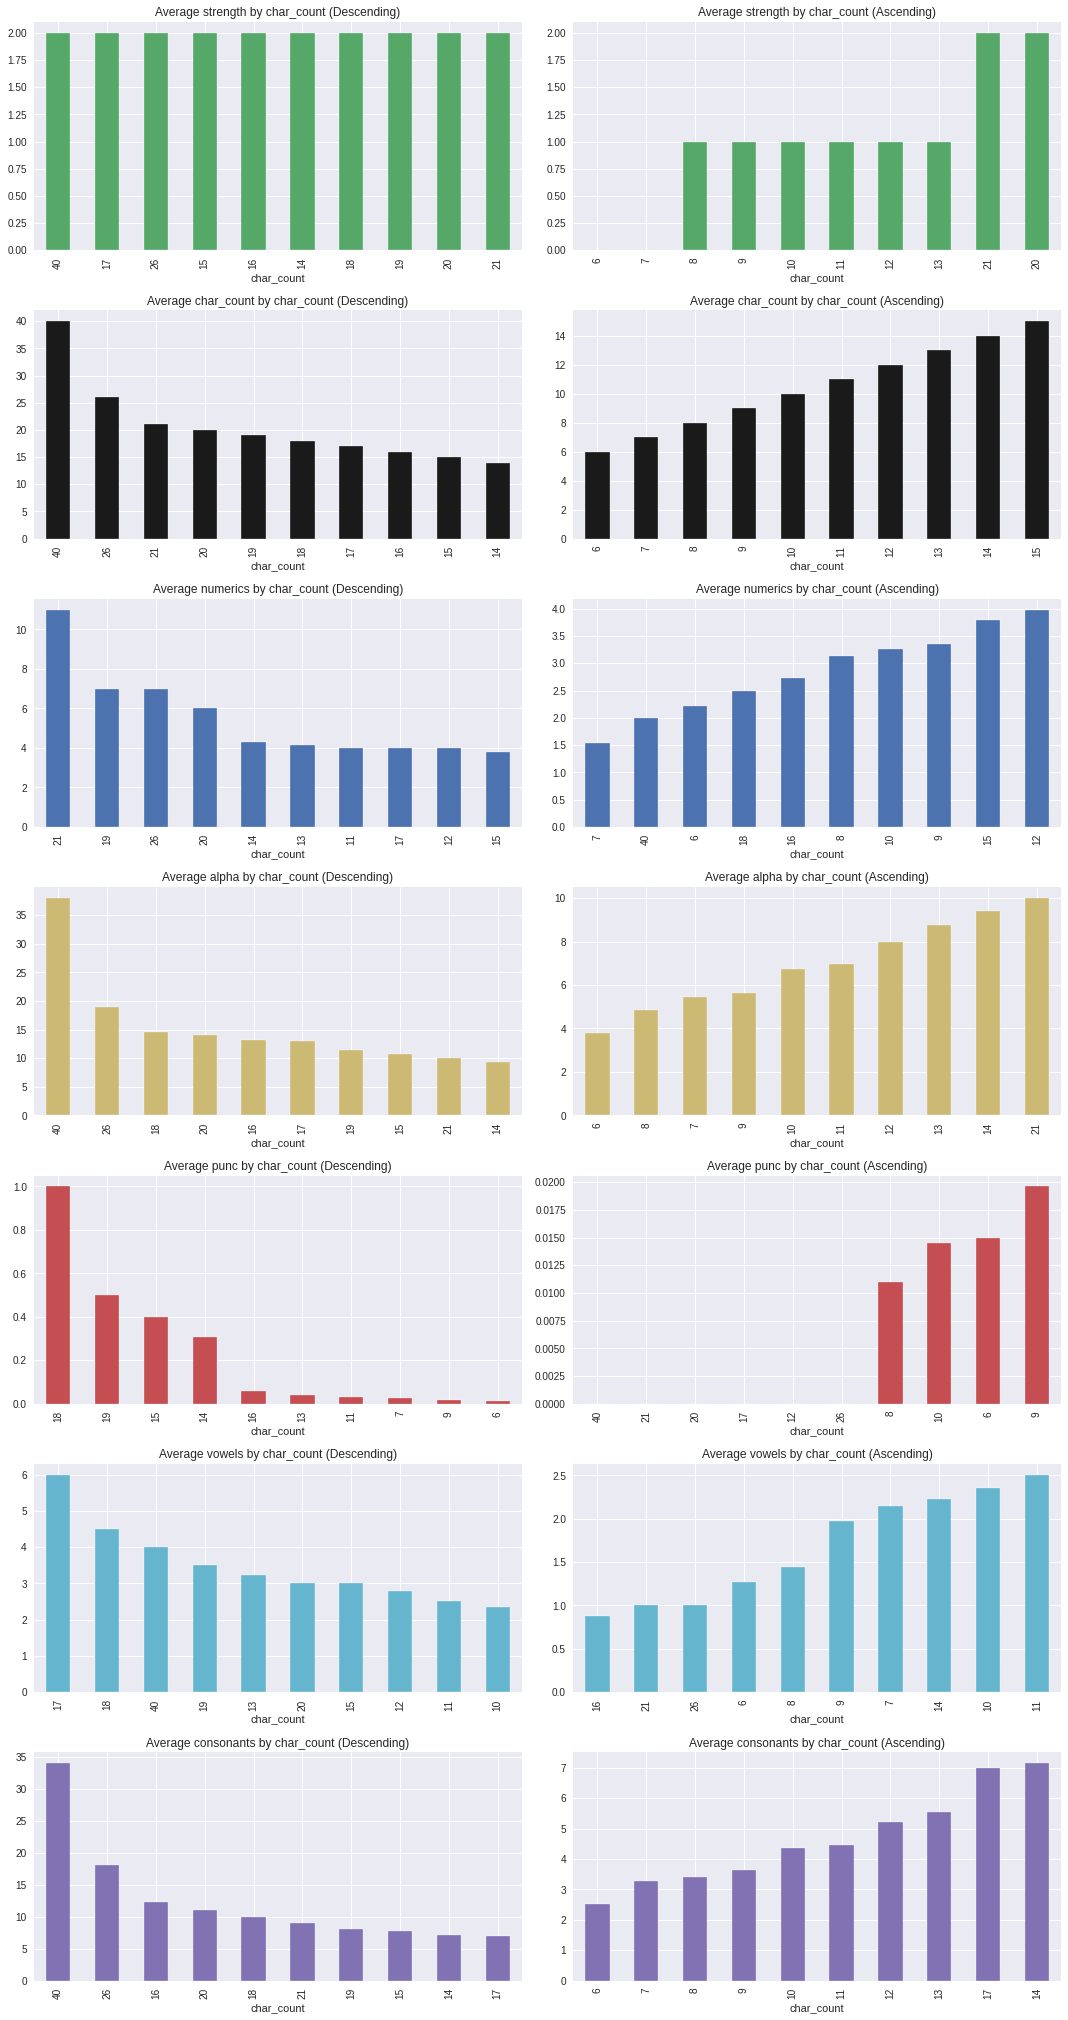

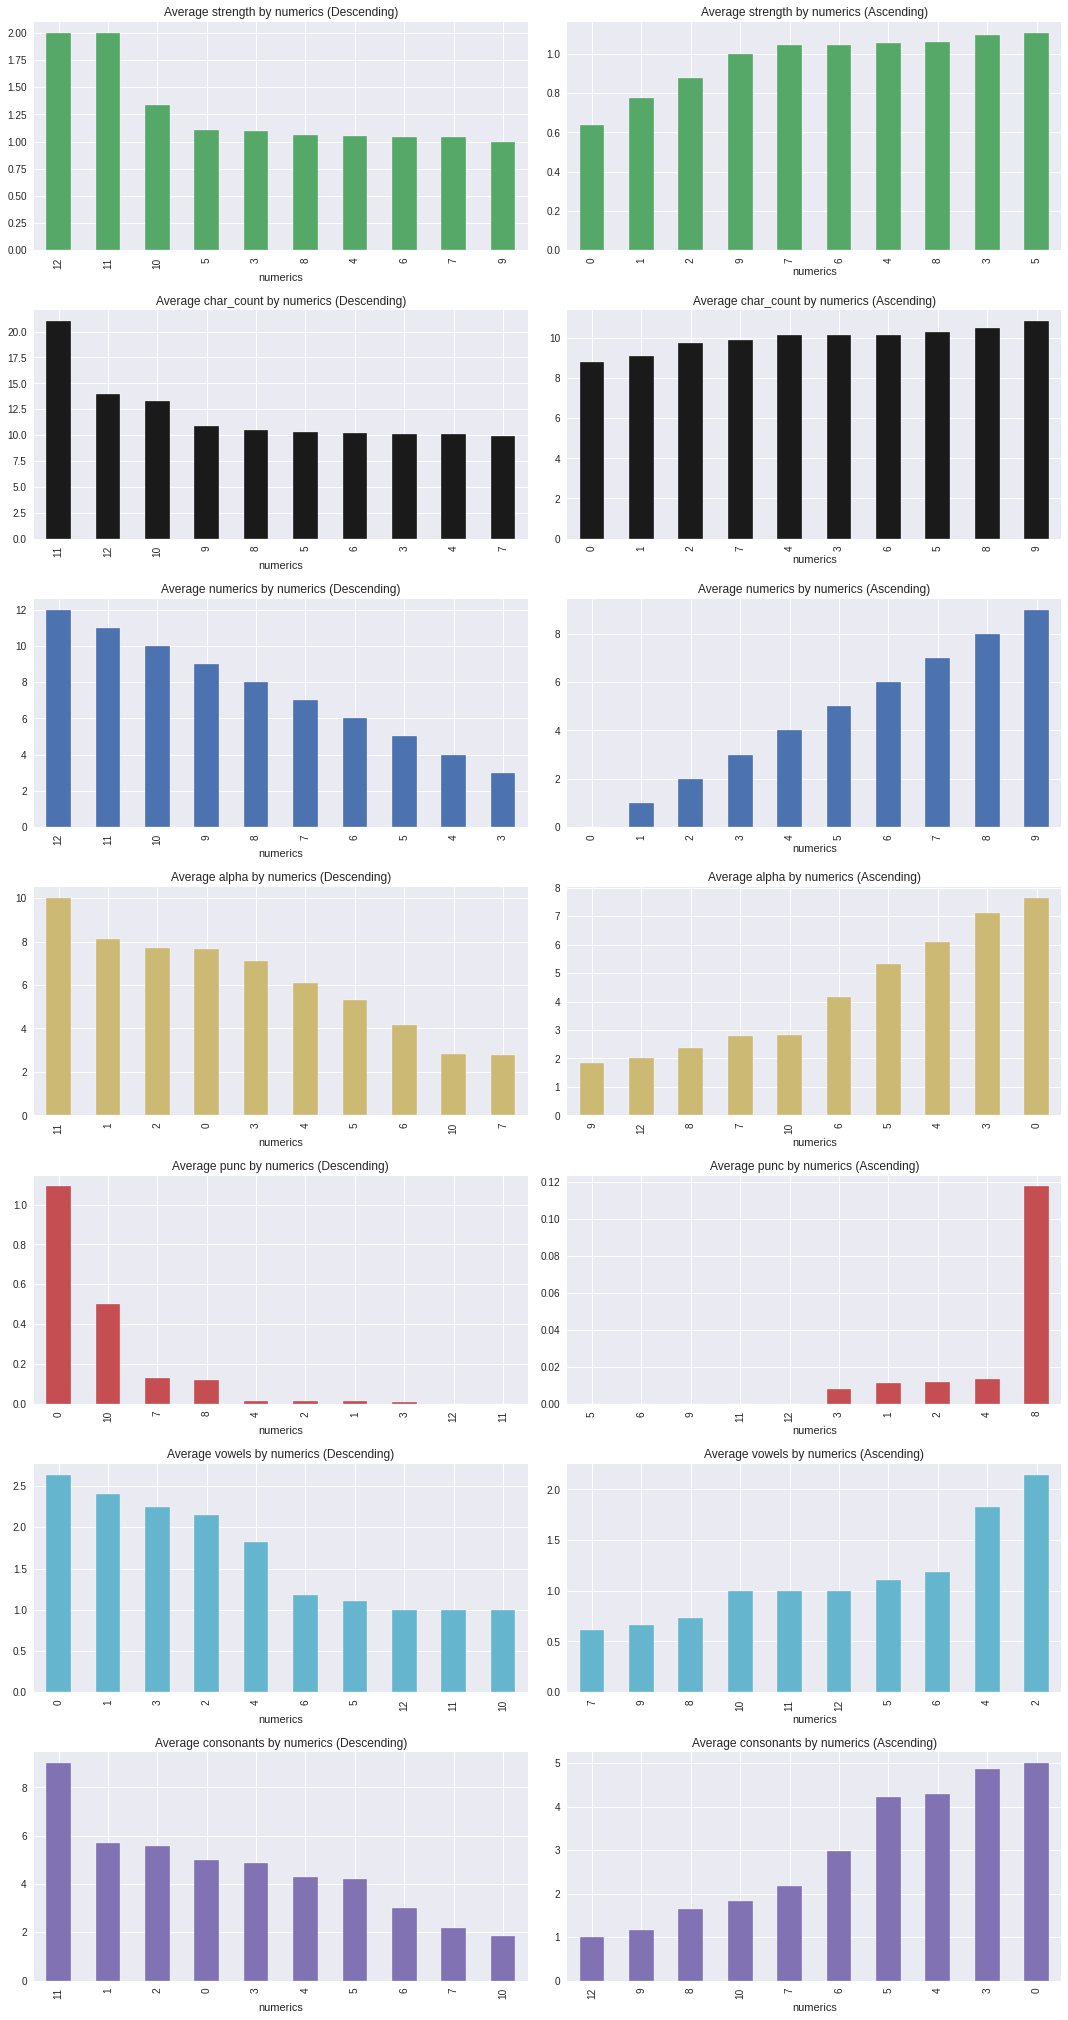

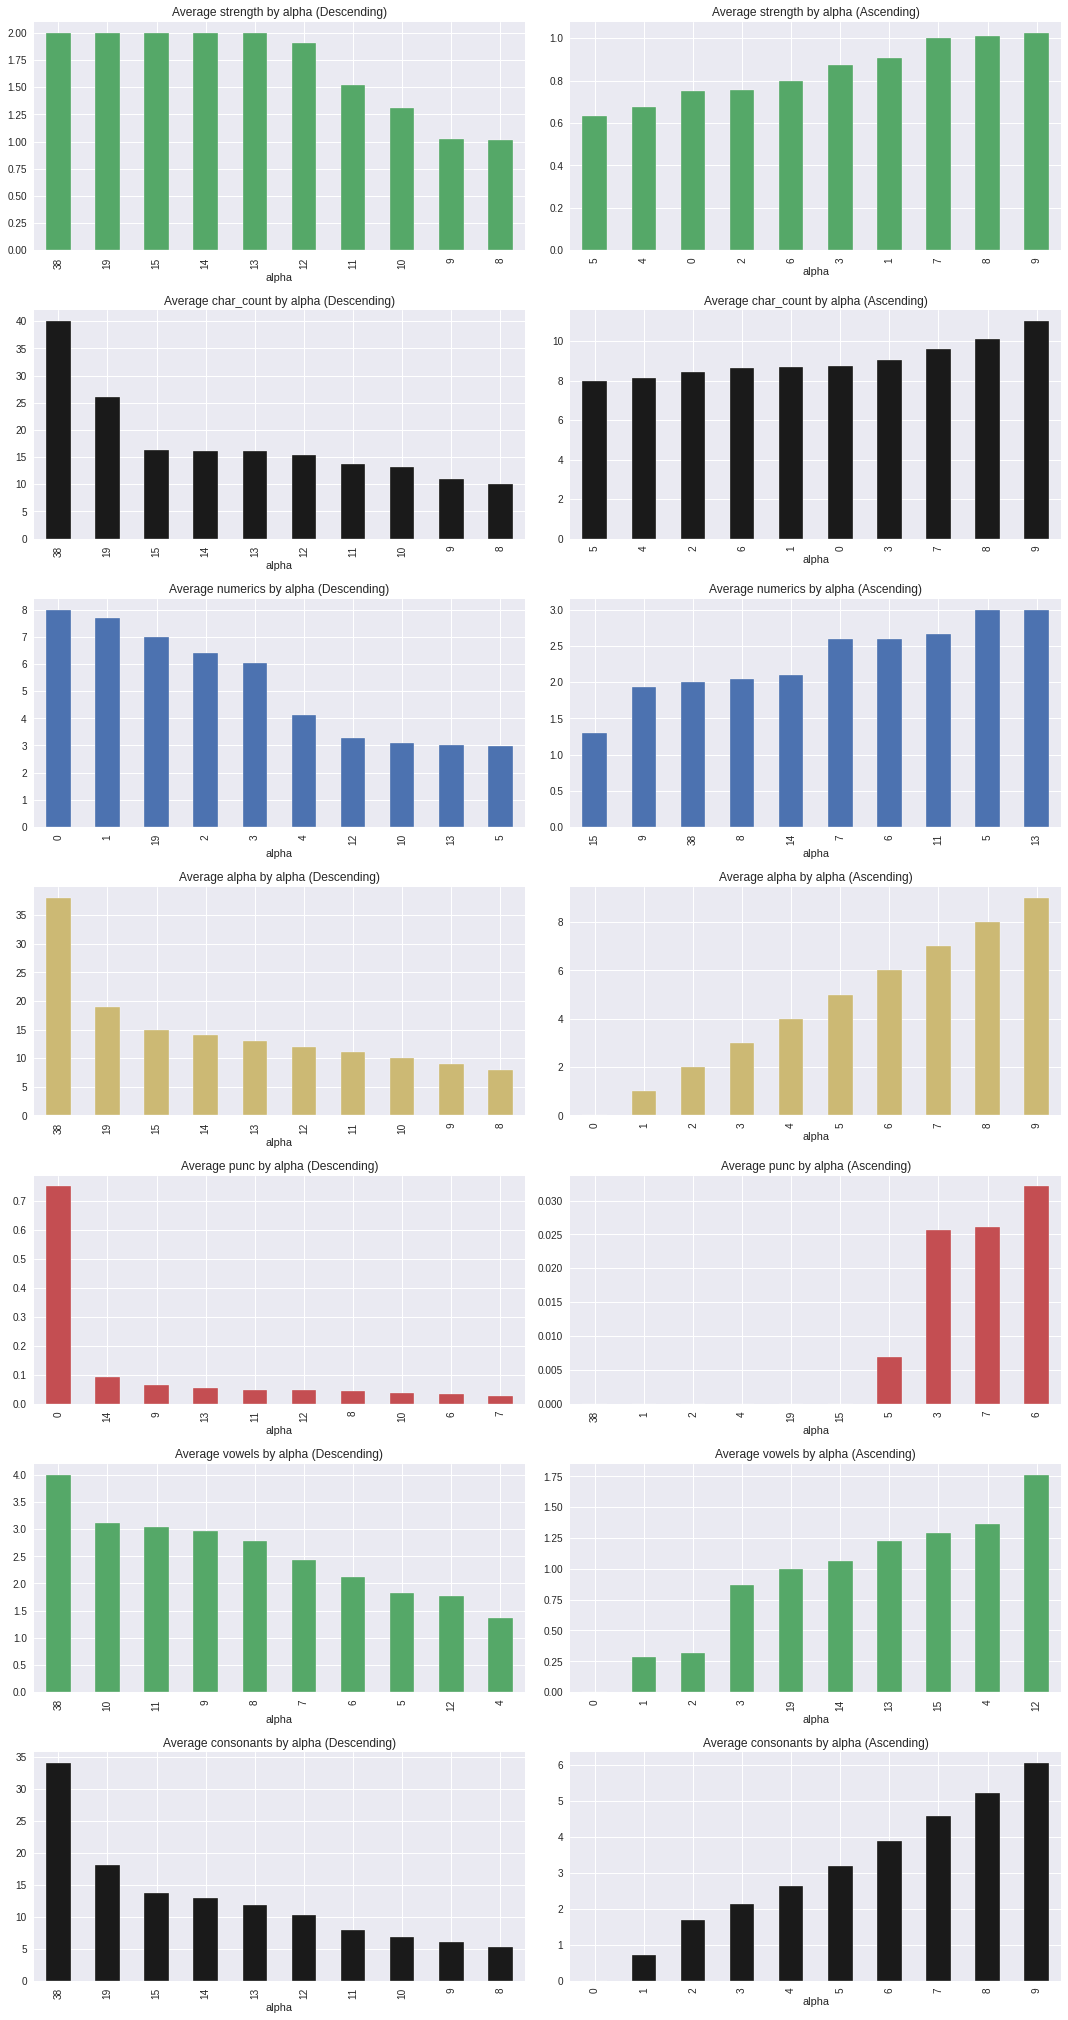

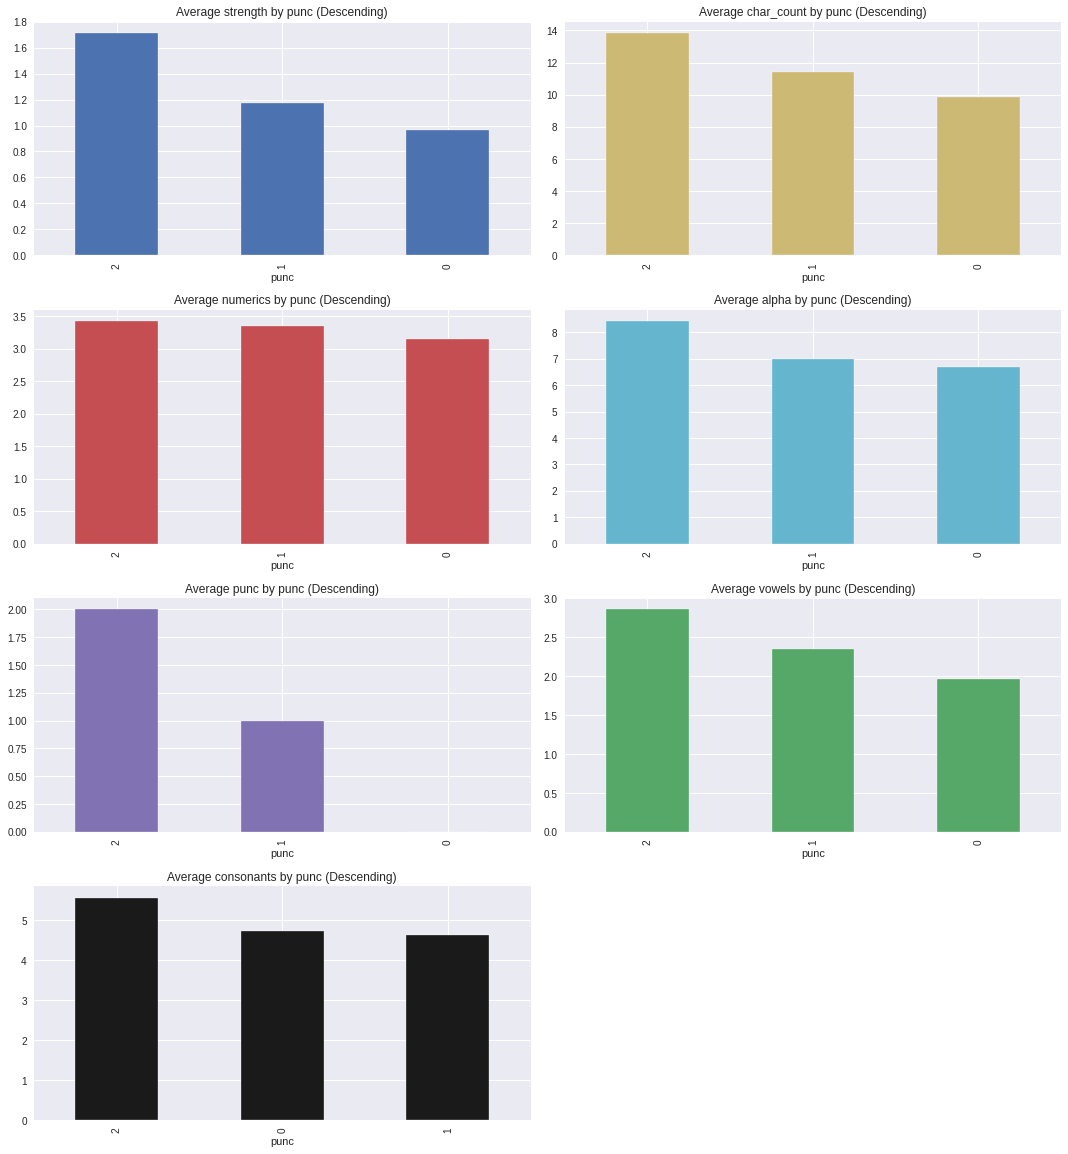

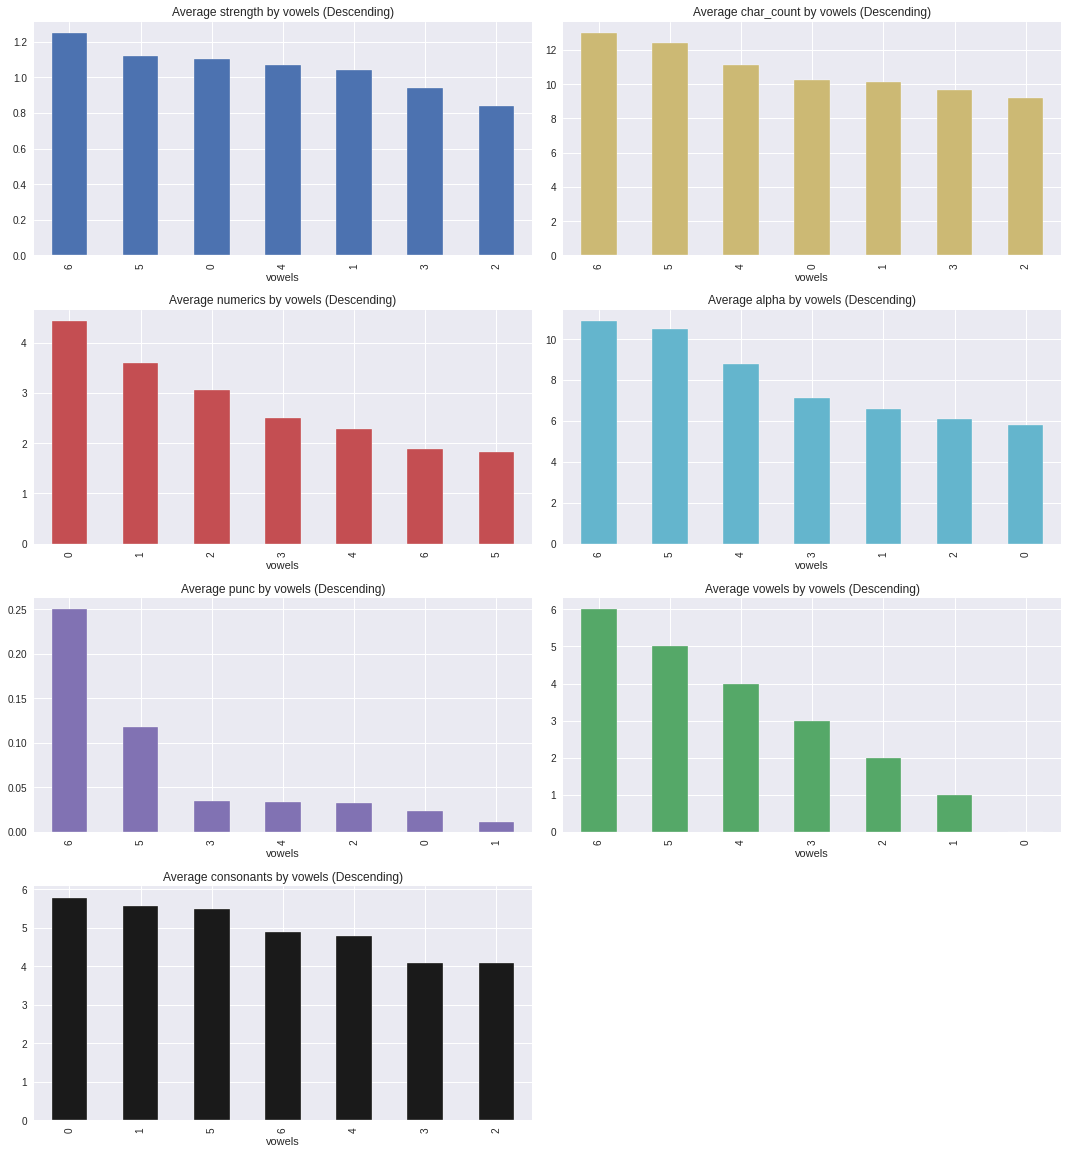

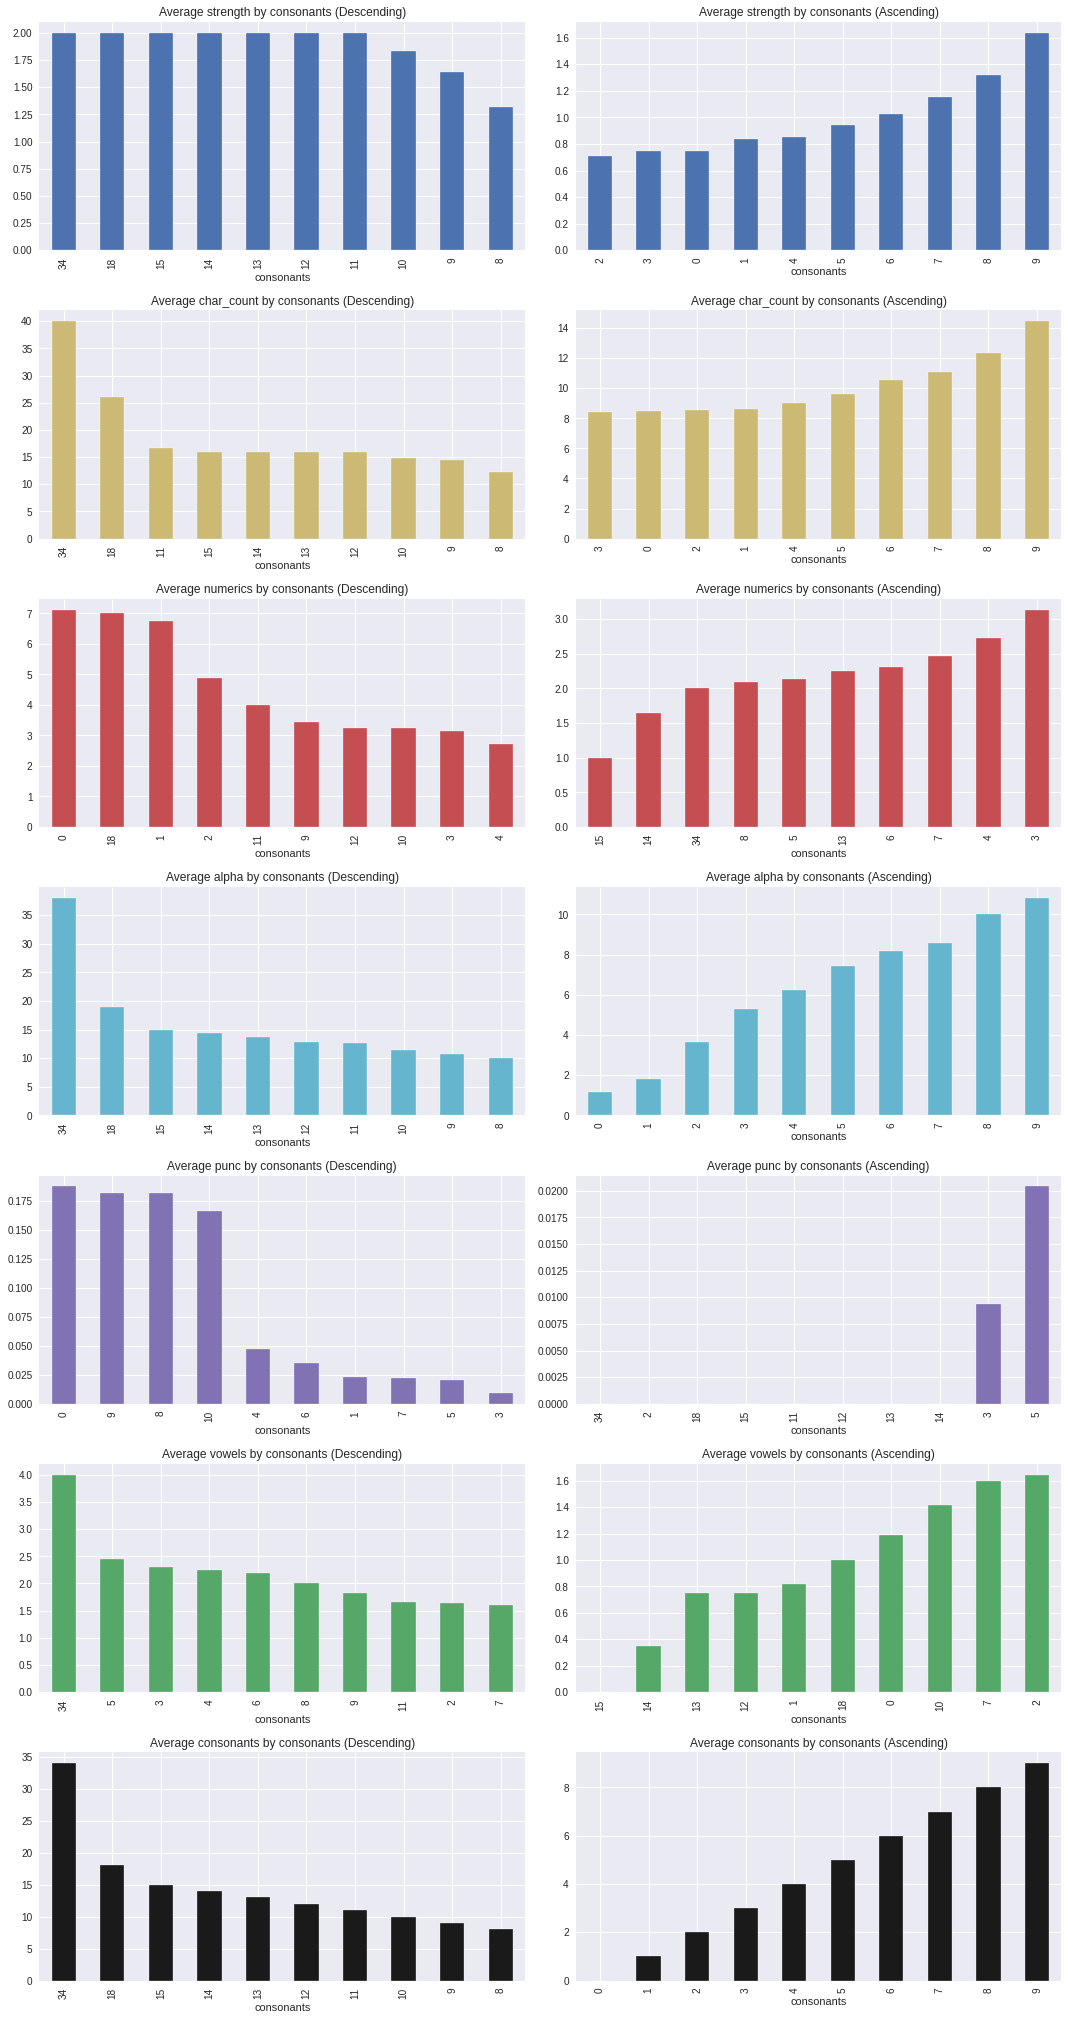

Time to run AutoViz (in seconds) = 29.346

 ###################### VISUALIZATION Completed ########################


In [ ]:

dfk= AV.AutoViz(filename="",
    sep=";",
    depVar="",
    dfte=df,
    header=1,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=1000,
    max_cols_analyzed=30,
)

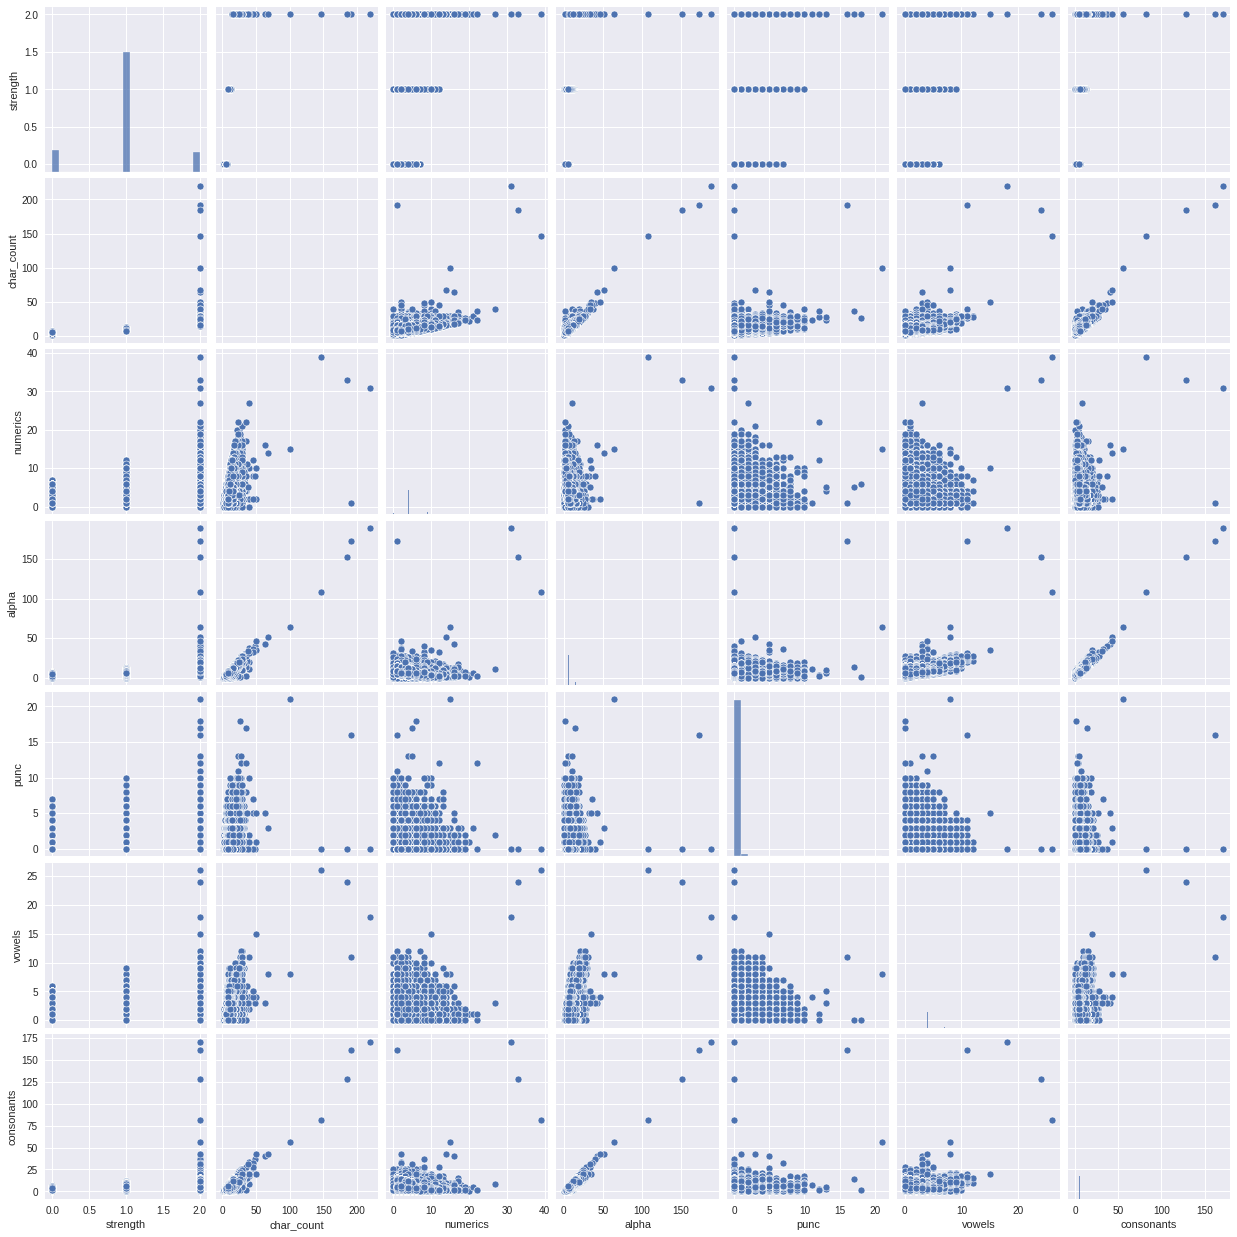

In [ ]:
#Plot Scatter Pairs plot of data set
sns.pairplot(df)

In [ ]:
df[df['punc']!=0][1:100]

,password,strength,char_count,numerics,alpha,punc,vowels,consonants
22,klara-tershina3H,2,16,1,14,1,5,9
44,olmaz.,0,6,0,5,1,2,3
50,ok>bdk,0,6,0,5,1,1,4
60,khmer100.03278&?><Mnb,2,21,8,8,5,1,7
65,Iamthelegend1!,2,14,1,12,1,4,8
...,...,...,...,...,...,...,...,...
4150,17081945***,1,11,8,0,3,0,0
4268,d@redevil191191,2,15,6,8,1,3,5
4287,f4gam00r7_su.1c3,2,16,6,8,2,2,6
4299,amor#abuela1984,2,15,4,10,1,6,4


# **Suffle the Dataset**

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,password,strength,char_count,numerics,alpha,punc,vowels,consonants
0,132456410lbf,1,12,9,3,0,0,3
1,mmmmpppp98,1,10,2,8,0,0,8
2,axyqiwu734,1,10,3,7,0,3,4
3,amena1,0,6,1,5,0,3,2
4,fellowship89,1,12,2,10,0,3,7


In [ ]:
df.shape

(669639, 8)

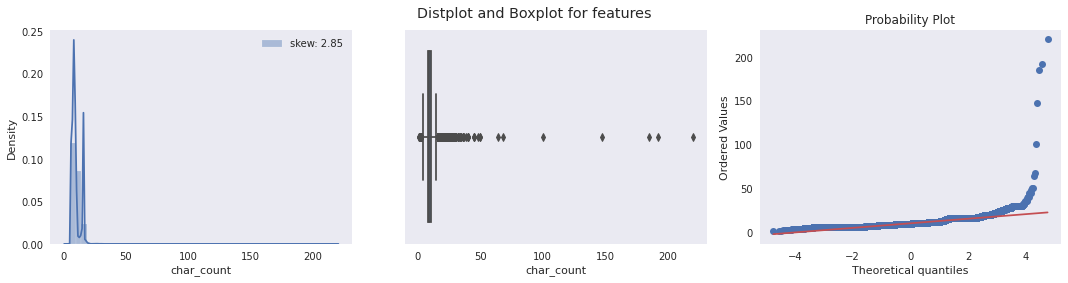

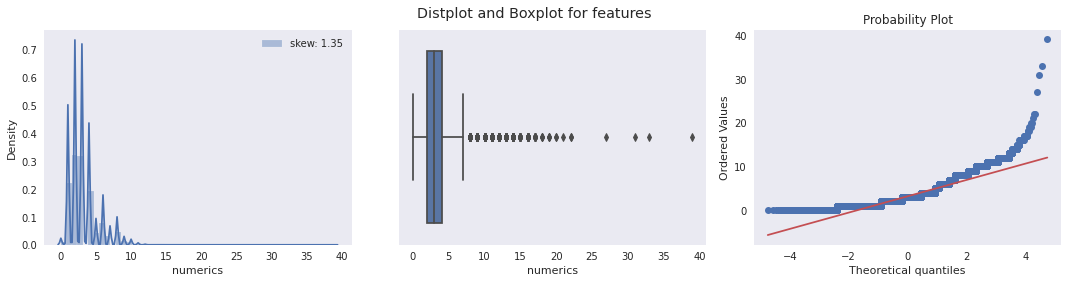

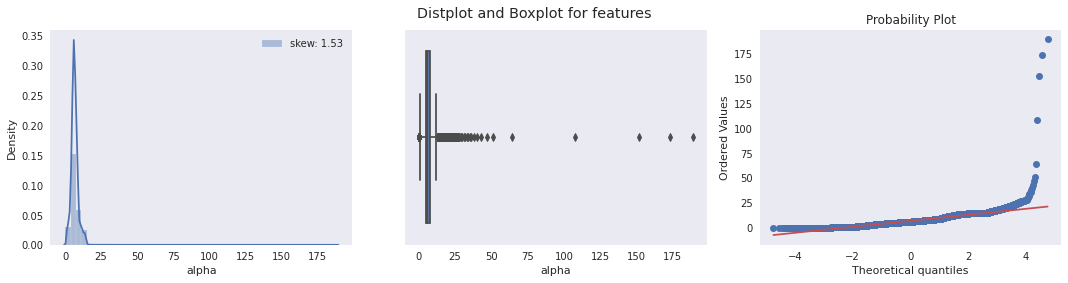

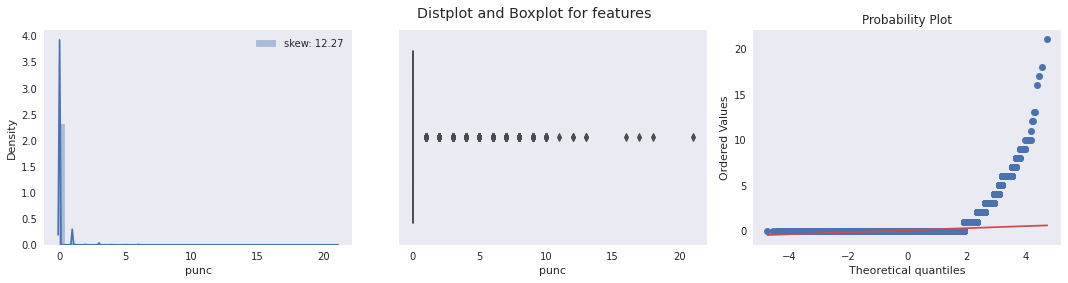

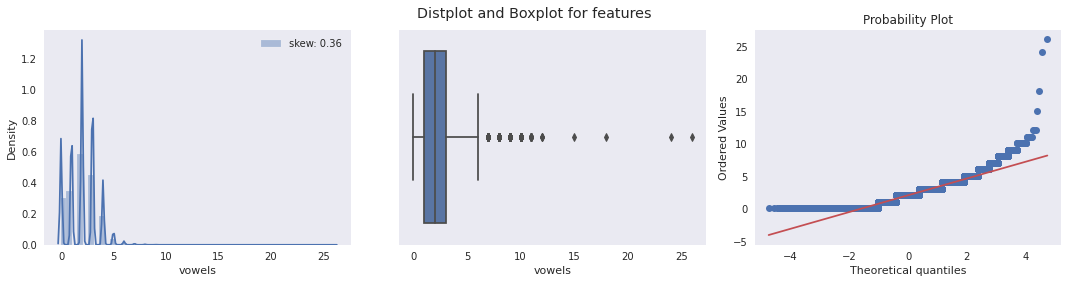

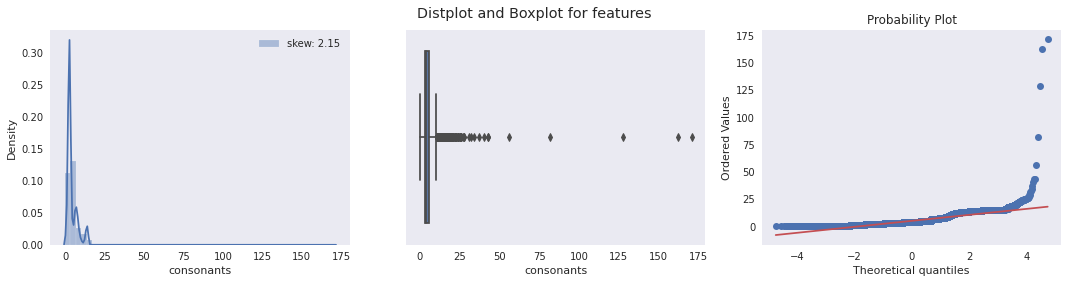

In [ ]:
from scipy import stats
features=df.columns
sns.set_style('dark')
features=["char_count","numerics","alpha","punc","vowels","consonants"]
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.suptitle("Distplot and Boxplot for features")
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

By Visualizing the scatter plot we could see, data set has some outliers in the continuous variable which variables have developed by us. For example, the like length of characters, punctuation, number etc. So, we could say according to the password strength It might be presented differently in the length of punctuation, numbers so on. So, It can be lead to outliers presented in the dataset.

In [ ]:
df.shape

(669639, 8)

### **Handle with Outliers-Capping using Percentile method (Winsorization )**

In [ ]:
new_df=df.copy()
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [ ]:
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
features=['char_count','numerics','alpha','punc','vowels','consonants']
percentile_capping(new_df, features, 0.01, 0.01)

### **Comparison of outliers before and after removing the outliers**

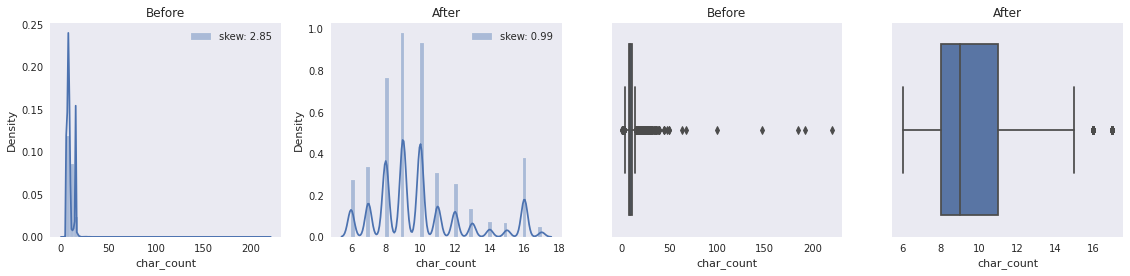

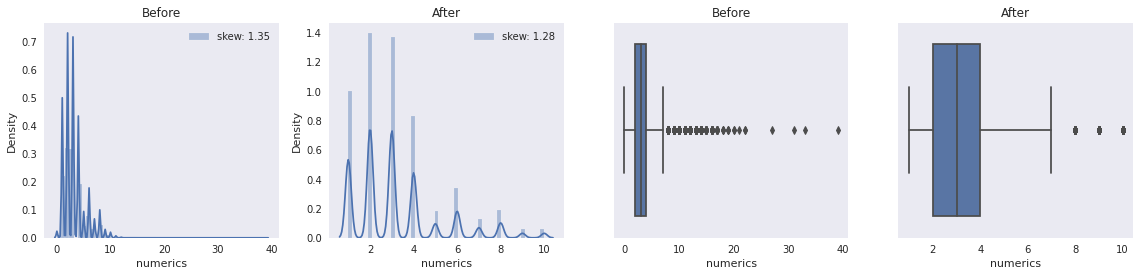

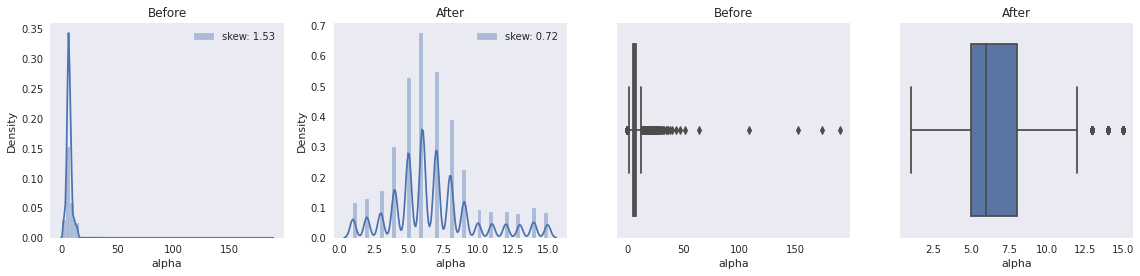

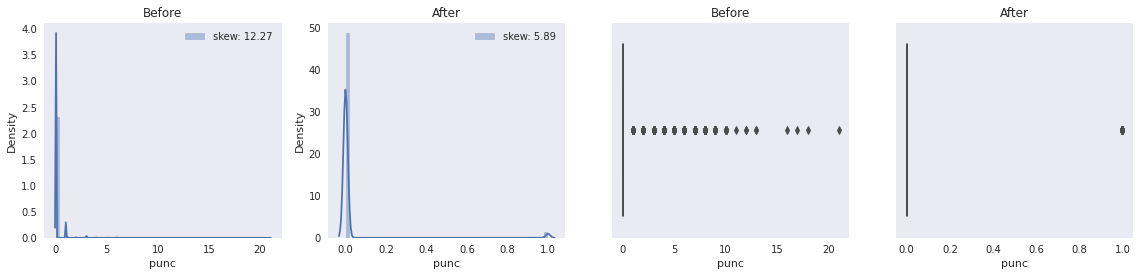

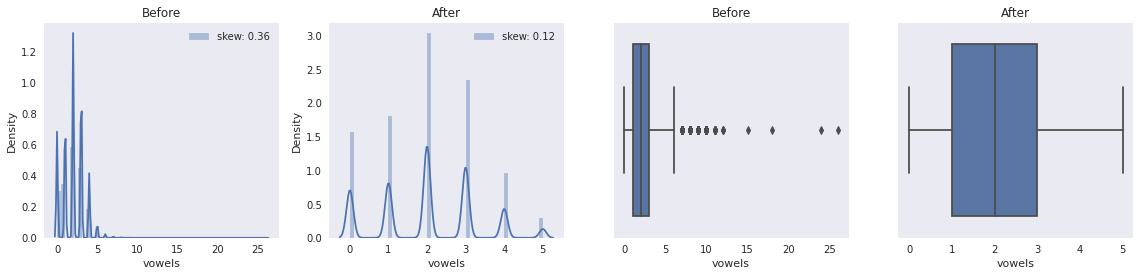

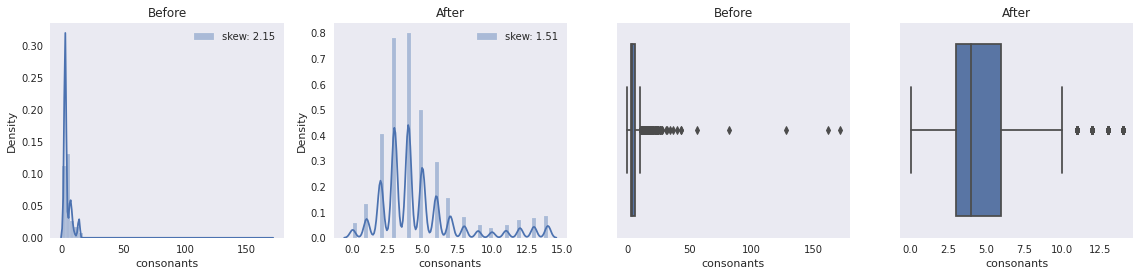

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(new_df[col], label="skew: " + str(np.round(new_df[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(new_df[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

Here, we could see after using the "winsorization" method how was changed the outliers. Also, we can see after handling outliers all five continuous variables still have some outliers. but we don't need to do a second performance for dealing with outliers because It will generate new outliers again and again.

### For modelling purpose, I'm going to take only 60% of the observation from the dataset

In [ ]:
from sklearn import model_selection
df1,df2=model_selection.train_test_split(df,test_size=0.4,random_state=100)

### Modeling Classification Alogorithom

In [ ]:
# Seperate dependent variables and independent variables
X=df1.iloc[:,2:8]
y=df1.iloc[:,1]

In [ ]:
X.head()

,char_count,numerics,alpha,punc,vowels,consonants
188084,8,2,6,0,1,5
253671,12,4,8,0,3,5
306501,12,3,9,0,2,7
31318,10,2,8,0,5,3
137888,11,8,3,0,2,1


In [ ]:
y.head()

188084    1
253671    1
306501    1
31318     1
137888    1
Name: strength, dtype: int64

### **Train-Test Spliting**

In [ ]:
from sklearn import model_selection

x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=100)
#print("Training data set contain " + " " + str(len(x_train))+ " "+ "Observation")
#print("Testing data set contain  " + " " + str(len(x_test))+ " "+ "Observation")

Create the Common Function for Traditional Algorithoms

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix for Password Prediction',
                          cmap='Reds'):
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,average_precision_score,roc_auc_score,classification_report
import itertools
from inspect import signature
from sklearn.metrics import r2_score, roc_curve,accuracy_score

def modeling(classifier,x_train,y_train,x_test,y_test):
  
  classifier.fit(x_train, y_train)

  # Predicting Testing Results
  predicted = classifier.predict(x_test)

  #Making the confusion Matrix
  cm=confusion_matrix(y_test,predicted)

  #Ploting Confusion Matrix
  plot_confusion_matrix(cm, classes=['password-weak', 'password-Medium','password-Strong'])
  #Making Classification Report
  cr = classification_report(y_test,predicted)
  print(cr)
  


### Logistic Regression Modeling

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10590
           1       1.00      1.00      1.00     59756
           2       1.00      1.00      1.00     10011

    accuracy                           1.00     80357
   macro avg       1.00      1.00      1.00     80357
weighted avg       1.00      1.00      1.00     80357



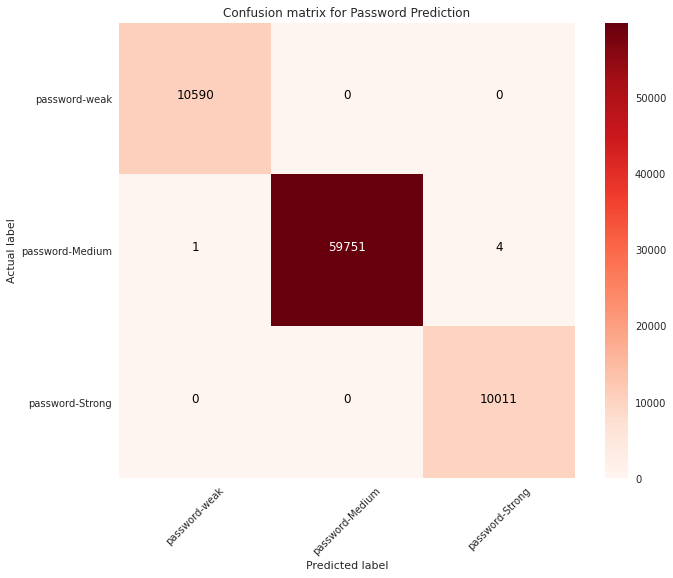

In [ ]:
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression(penalty='l2',multi_class='ovr'),x_train,y_train,x_test,y_test)

### Multinomial Logistic Regression Model

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10590
           1       1.00      1.00      1.00     59756
           2       1.00      1.00      1.00     10011

    accuracy                           1.00     80357
   macro avg       1.00      1.00      1.00     80357
weighted avg       1.00      1.00      1.00     80357



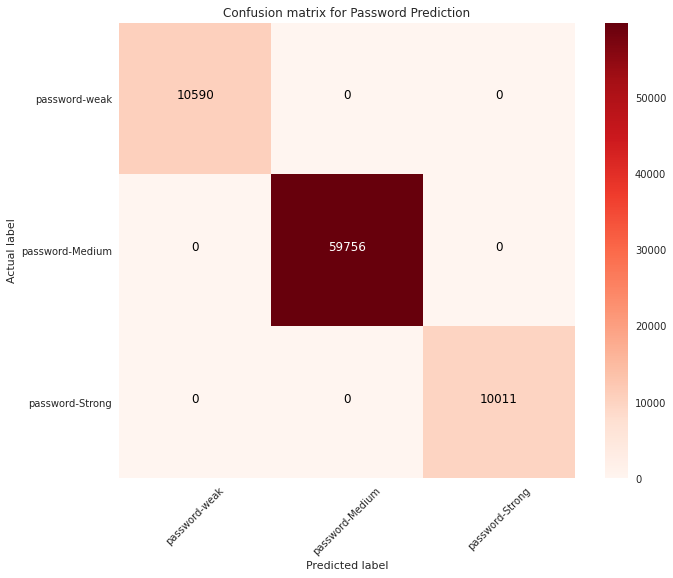

In [ ]:

modeling(LogisticRegression(random_state=100, multi_class='multinomial', solver='newton-cg'),x_train,y_train,x_test,y_test)

### Support Vector Classifier(SVC)

In [ ]:
!pip install scikit-learn

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10590
           1       1.00      1.00      1.00     59756
           2       1.00      1.00      1.00     10011

    accuracy                           1.00     80357
   macro avg       1.00      1.00      1.00     80357
weighted avg       1.00      1.00      1.00     80357



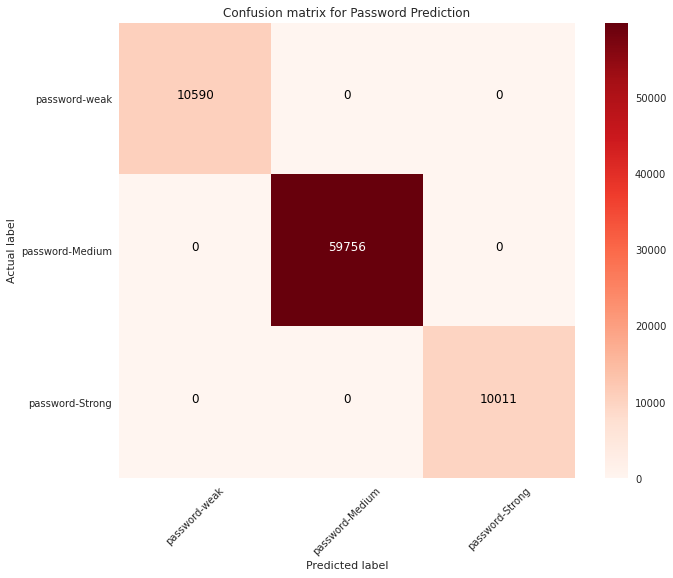

In [ ]:
from sklearn.svm import SVC
modeling(SVC(),x_train,y_train,x_test,y_test)

In [ ]:
import nltk
import sklearn
import sklearn

#print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('SVM_classifier.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

NameError: ignored

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)
#predicted = model.predict(x_test)


### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state = 100)
model.fit(x_train, y_train)
predicted = model.predict(x_test)



Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10590
           1       1.00      1.00      1.00     59756
           2       1.00      1.00      1.00     10011

    accuracy                           1.00     80357
   macro avg       1.00      1.00      1.00     80357
weighted avg       1.00      1.00      1.00     80357



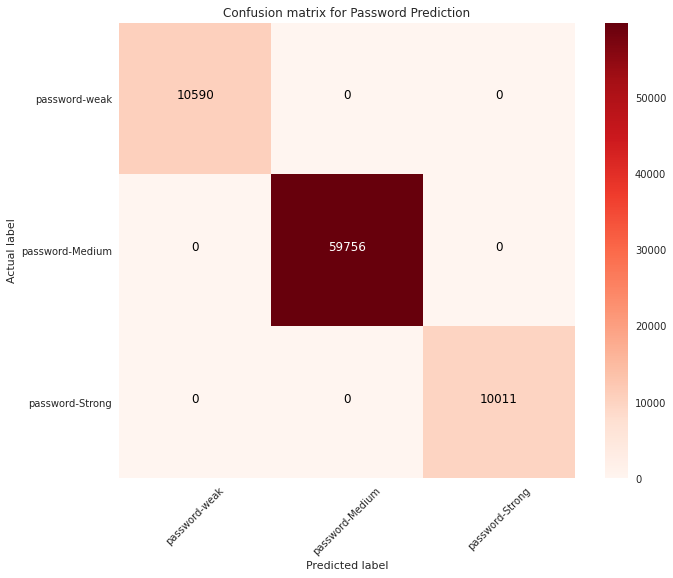

In [ ]:
  #Making the confusion Matrix
  cm=confusion_matrix(y_test,predicted)

  #Ploting Confusion Matrix
  plot_confusion_matrix(cm, classes=['password-weak', 'password-Medium','password-Strong'])
  #Making Classification Report
  cr = classification_report(y_test,predicted)
  print(cr)


Above traditional algorithms, we have good accuracy, precision and F1 score So, we can take any of the algorithms from that. So, I will take SVM for my Model deployment.

In [ ]:
def convert(text):
  # Find the length of character presented in password
  char_count=len(text)
  text=pd.Series(text)
  # # Find the length of number presented in password
  numerics=text.apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()]))
  # # Find the length of Alphabets presented in password
  alpha=text.apply(lambda x: len([x for x in list(x) if x.isalpha()]))
  # # Find the length of puncuation presented in password
  specialSymbols = '!?%&.:~/\|,;<>-_+@#$%^&*(){}[]'
  punc=text.apply(lambda x: len([x for x in list(x) if x in specialSymbols]))
  # # Find the length of vowels presented in password
  vowels = ['a', 'e', 'i', 'o', 'u']
  vowels=text.apply(lambda x: len([x for x in list(x) if x in vowels]))
  # # Find the length of consonants presented in password
  consonants=text.apply(lambda x: len([x for x in list(x) if x not in vowels and x.isalpha()]))
  return char_count,numerics[0],alpha[0],punc[0],vowels[0],consonants[0]



In [ ]:
length=convert('KA1995*$;')

In [ ]:
model=pickle.load( open( "/content/drive/MyDrive/Password_strenght_trained_model", "rb" ) )

In [ ]:
length[5]

2

In [ ]:
data =pd.DataFrame({'char_count':  [length[0]],
        'numerics': [length[1]],
        'alpha':  [length[2]],
        'punc':  [length[3]],
        'vowels':  [length[4]],
        'consonants':  [length[5]]
        })

In [ ]:
k=model.predict(data)
if k ==0:
  print('Password Strength is weak')
elif k==1:
  print('Password Strength is medium')
else:
  print('Password Strength is strong')

Password Strength is medium
